<a href="https://colab.research.google.com/github/ObjectMatrix/Automotive-Physical-Damage-Claimss/blob/main/automative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import nexessary libs

In [ ]:
!pip install tensorflow

In [5]:
import tensorflow as tf
# For data augmentation while data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pretrained MobileNet model.
from tensorflow.keras.applications import MobileNetV2

# Performing MaxPooling operations
from tensorflow.keras.layers import MaxPooling2D

# For performing dropout operation
from tensorflow.keras.layers import Dropout

# For flattening operation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

# Input() is used to instantiate a Keras tensor.
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# We use adam optimizer
from tensorflow.keras.optimizers import Adam

# Preprocesses a tensor or Numpy array encoding a batch of images.
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Converts a PIL Image instance to a Numpy array.
from tensorflow.keras.preprocessing.image import img_to_array

# Loads an image into PIL format.
from tensorflow.keras.preprocessing.image import load_img

# Converts a class vector (integers) to binary class matrix.
from tensorflow.keras.utils import to_categorical

# Binarize labels in a one-vs-all fashion.
from sklearn.preprocessing import LabelBinarizer

# Performing train-test split
from sklearn.model_selection import train_test_split

# For printing the metrics
from sklearn.metrics import classification_report

# For using strings in file structure path format
from imutils import paths

# For plotting losse functions
import matplotlib.pyplot as plt

# For performing mathematical computations
import numpy as np

# For file-related operations
import os

In [12]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Total training images 2
Total training images (Damaged) 0
Total training images (Damaged) 2

Total validation images 2
Total training images (Damaged) 0
Total training images (Damaged) 2

Total Number of Images:  4


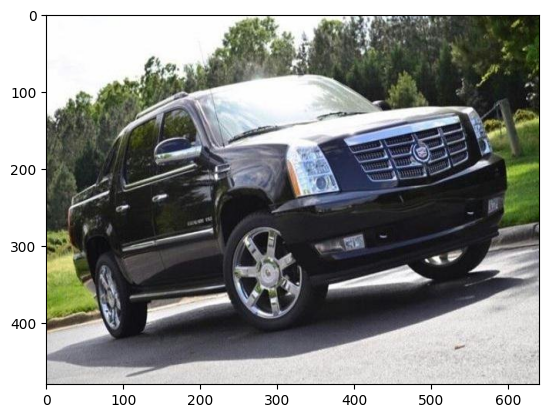

In [13]:
# Path to directory containing data
DataDir = "/content/drive/MyDrive/input/car-damage-detection/data1a"
# Path to training directory
train_dir = os.path.join(DataDir, 'training/')

# Path to validation directory
val_dir = os.path.join(DataDir, 'validation/')

# Path for damaged training images
train_damage = os.path.join(train_dir, '00-damage')
# Path for training images not damaged
train_not_damage = os.path.join(val_dir, '01-whole')

# Number of damaged training images
num_train_damage = len(os.listdir(train_damage))

# Number of training images not damaged
num_train_not_damage = len(os.listdir(train_not_damage))

# Path for damaged validation
val_damage = os.path.join(val_dir, '00-damage')

# Path for validation images not damaged
val_not_damage = os.path.join(val_dir, '01-whole')

# Number of damaged validation images
num_val_damage = len(os.listdir(val_damage))

# Number of validation images not damaged
num_val_not_damage = len(os.listdir((val_not_damage)))

# Number of training images
num_train = num_train_damage + num_train_not_damage

# Number of validation images
num_val = num_val_damage + num_val_not_damage


# Total images
total_images = num_val + num_train
print("Total training images",num_train)
print("Total training images (Damaged)", num_train_damage)
print("Total training images (Damaged)", num_train_not_damage)
print()

print("Total validation images", num_val)
print("Total training images (Damaged)", num_val_damage)
print("Total training images (Damaged)", num_val_not_damage)
print()

print("Total Number of Images: ",total_images)

# Plotting a sample image
plt.grid('')
image = plt.imread('/content/drive/MyDrive/input/car-damage-detection/data1a/training/01-whole/0195.jpg')
plt.imshow(image)
plt.show()